# Desafio 3

## Importando

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd   
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('dark')

def ColabOuCode():
    '''
    Importa o DataFrame de acordo com a plataforma usada. Retorna um DataFrame.
    '''
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TERA-desafio-3/data/fraud_detection_dataset.csv',
                         nrows=2000000,
                         verbose=False
                         )
    except:
        df = pd.read_csv('./data/fraud_detection_dataset.csv', 
                         nrows=10000, 
                         verbose=False
                        )
    return df


In [2]:
df = ColabOuCode()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df.shape

(2000000, 11)

In [4]:
print(df.info(verbose=True))
print()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 167.8+ MB
None

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [5]:
df = df.rename(columns={
        'step':'HorasInicio',
        'type':'TipoTransacao',
        'amount':'ValorTransacao',
        'nameOrig':'NomOrigem',
        'oldbalanceOrig':'oldBalancoOrigem',
        'newbalanceOrig':'newBalancoOrigem',
        'nameDest':'NomeDestino',
        'oldbalanceDest':'oldBalancoDestino',
        'newbalanceDest':'newBalancoDestino',
        'isFraud':'Fraude',
        'isFlaggedFraud':'SinalFraude',
        }
    )

pass

In [6]:
pd.set_option('display.max_columns', 11)
df.head()

,HorasInicio,TipoTransacao,ValorTransacao,NomOrigem,oldbalanceOrg,newBalancoOrigem,NomeDestino,oldBalancoDestino,newBalancoDestino,Fraude,SinalFraude
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.describe(percentiles=(0.9,0.95,0.99))

,HorasInicio,ValorTransacao,oldbalanceOrg,newBalancoOrigem,oldBalancoDestino,newBalancoDestino,Fraude,SinalFraude
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2000000.0
mean,8.484592e+01,1.611882e+05,8.574199e+05,8.786843e+05,9.960116e+05,1.114418e+06,1.018000e-03,0.0
std,6.277502e+01,2.710108e+05,2.928641e+06,2.964900e+06,2.304238e+06,2.399416e+06,3.188988e-02,0.0
min,1.000000e+00,6.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,4.500000e+01,7.805394e+04,1.499200e+04,0.000000e+00,1.370054e+05,2.271597e+05,0.000000e+00,0.0
90%,1.620000e+02,3.763364e+05,1.907183e+06,2.054204e+06,2.791082e+06,3.114542e+06,0.000000e+00,0.0
95%,1.650000e+02,5.241575e+05,5.948783e+06,6.108255e+06,4.790185e+06,5.169396e+06,0.000000e+00,0.0
99%,1.790000e+02,1.324815e+06,1.638778e+07,1.654101e+07,1.115629e+07,1.157275e+07,0.000000e+00,0.0
max,1.790000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.220740e+07,4.228378e+07,1.000000e+00,0.0


In [8]:
df.isnull().sum()

HorasInicio          0
TipoTransacao        0
ValorTransacao       0
NomOrigem            0
oldbalanceOrg        0
newBalancoOrigem     0
NomeDestino          0
oldBalancoDestino    0
newBalancoDestino    0
Fraude               0
SinalFraude          0
dtype: int64

KeyboardInterrupt: ignored

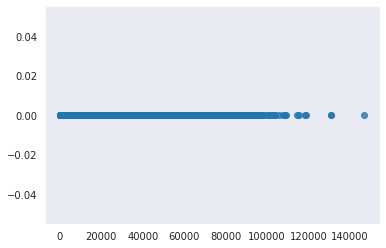

In [9]:
'''for i in df.TipoTransacao.unique():
    sns.regplot(
        x=df['ValorTransacao'][df.TipoTransacao == i][df.Fraude == 1],
        y=df['Fraude'][df.TipoTransacao == i][df.Fraude == 1],
        logistic=True
    )
    plt.show()
'''

#fig = plt.subplots(figsize=(16,8))

#df['ValorTransacao'] = np.log(df['ValorTransacao'])

for i in df.TipoTransacao.unique():
    sns.regplot(
                x=df['ValorTransacao'][df.TipoTransacao == i],
                y=df['Fraude'][df.TipoTransacao == i],
                logistic=True
    ).set_title(i)
    plt.show()
    print()